# Multiple Linear Regression
## Shared Bikes Demand Prediction - Assignment Solution

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands



The solution is divided into the following sections: 
- Data understanding
- EDA
- Data Visualisation 
- Data preparation
- Model building and evaluation

# Dataset characteristics
	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

# 1. Data Understanding

Let us first import the required libraries and look at the data for understanding the data.


In [497]:
# importing all required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [498]:
# Reading the dataset
Bike_Sharing= pd.read_csv("day.csv")


In [499]:
# First few rows of the dataset
Bike_Sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [500]:
# Shape of the dataframe
print ("Rows     : " ,Bike_Sharing.shape[0])
print ("Columns  : " ,Bike_Sharing.shape[1])
print ("\nFeatures : \n" ,Bike_Sharing.columns.tolist())

Rows     :  730
Columns  :  16

Features : 
 ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [501]:
# Summary info of the dataframe
print(Bike_Sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


# 2. EDA


Missing values :   0


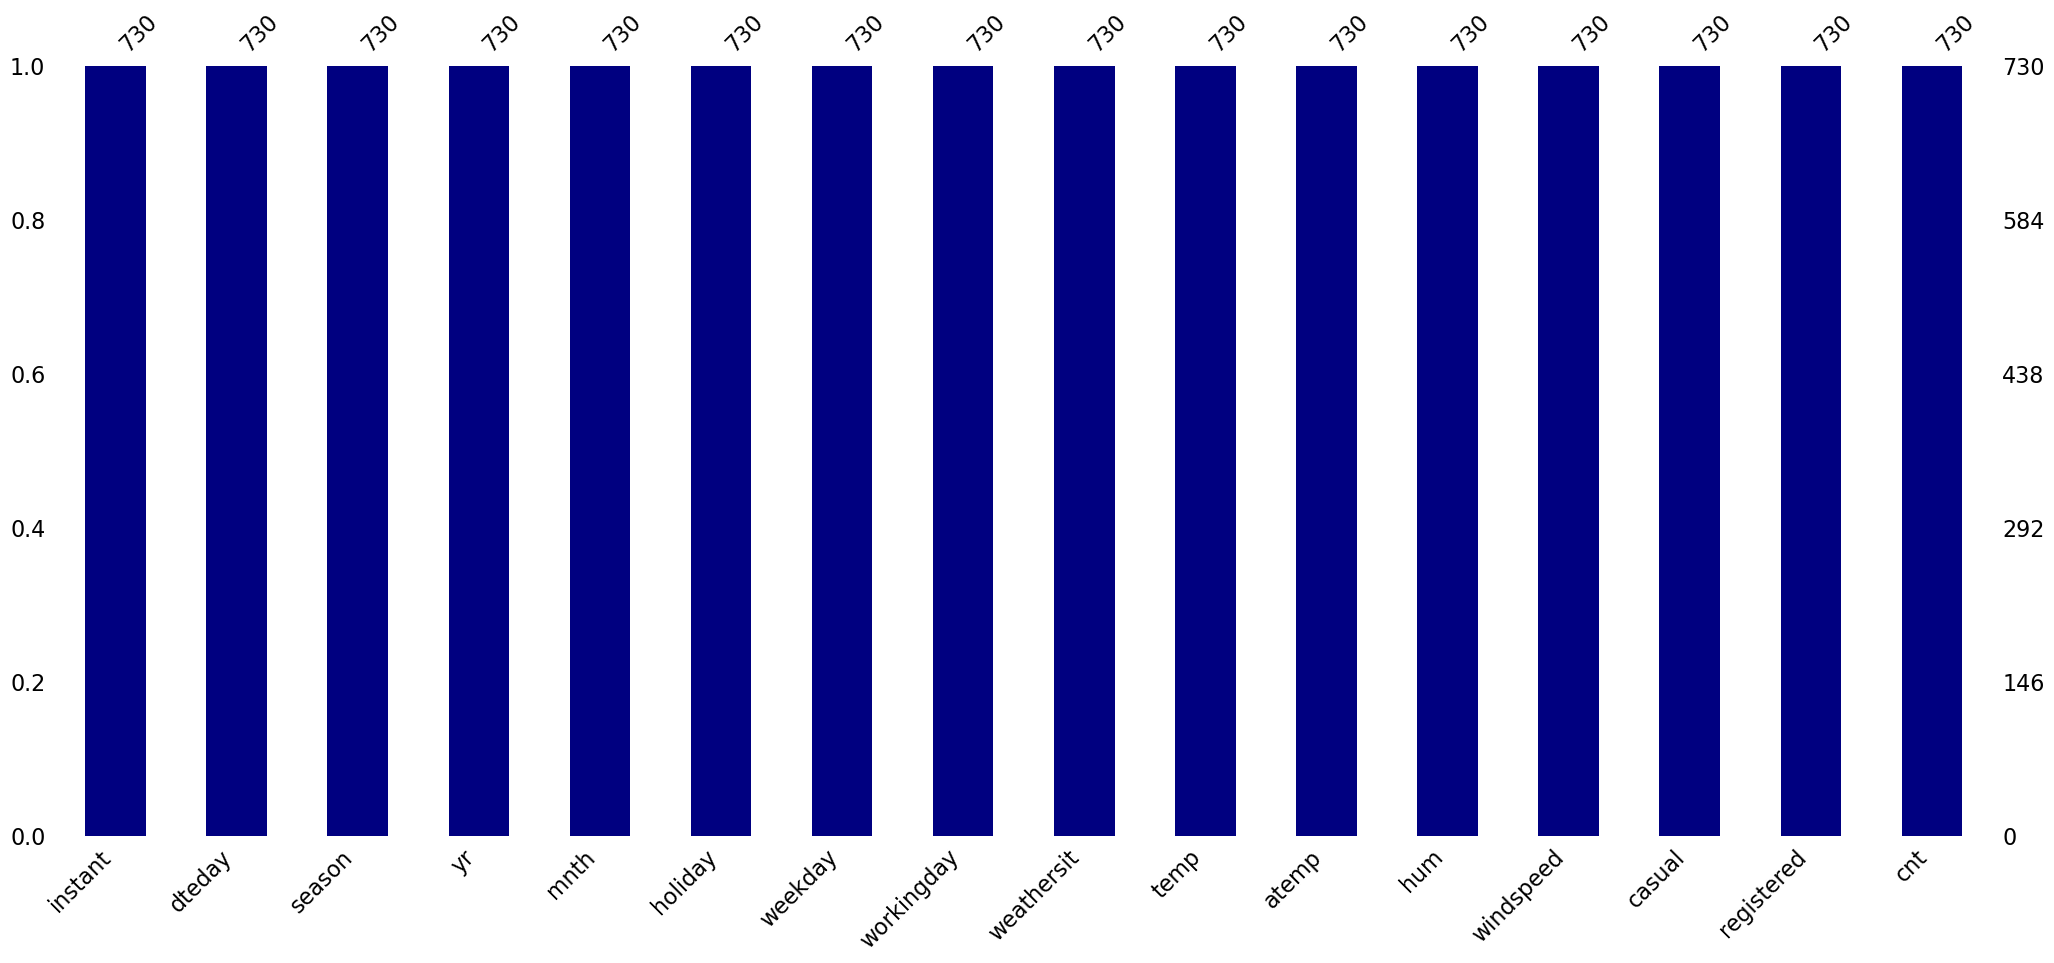

In [502]:
# Checking for missing values
print ("\nMissing values :  ", Bike_Sharing.isnull().sum().values.sum())
msno.bar(Bike_Sharing,color='navy')
plt.show()

<i>As per the data dictionary some columns which are numeric type should be categorical. Let us assign string values instead of these numeric values.</i>

In [503]:
#Assigning string values to different season instead of numeric values.
# As per data dictionary 1=spring, 2=summer, 3=fall and 4=winter

# A function created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Applying the function to the column
Bike_Sharing[['season']] = Bike_Sharing[['season']].apply(object_map)

In [504]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
Bike_Sharing['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [505]:
Bike_Sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [506]:
# Assigning string values to different months instead of numeric values.


# A function created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
Bike_Sharing[['mnth']] = Bike_Sharing[['mnth']].apply(object_map)

In [507]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
Bike_Sharing['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [508]:
Bike_Sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [509]:
# Assigning string values to weekdays instead of numeric values.

# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat', 0: 'Sun'})

# Applying the function to the two columns
Bike_Sharing[['weekday']] = Bike_Sharing[['weekday']].apply(str_map)

In [510]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
Bike_Sharing['weekday'].astype('category').value_counts()

Mon      105
Sat      105
Sun      105
Fri      104
Thurs    104
Tues     104
Wed      103
Name: weekday, dtype: int64

In [511]:
Bike_Sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tues,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [512]:
# Assigning string values to weathersit instead of numeric values.

# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Good', 2: 'Ok', 3: 'Bad', 4: 'Extreme'})

# Applying the function to the column
Bike_Sharing[['weathersit']] = Bike_Sharing[['weathersit']].apply(str_map)

In [513]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
Bike_Sharing['weathersit'].astype('category').value_counts()

Good    463
Ok      246
Bad      21
Name: weathersit, dtype: int64

In [514]:
# working day or not (0: No, 1: Yes)
Bike_Sharing['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [515]:
# holiday or not (0: No, 1: Yes)
Bike_Sharing['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [516]:
# year (0: 2018, 1:2019)
Bike_Sharing['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [517]:
Bike_Sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Ok,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Ok,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tues,1,Good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [518]:
Bike_Sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


<i>Let us drop some columns that will not be necessary for the model.</i>


In [519]:
Bike_Sharing.drop('instant',axis=1,inplace=True) 

In [520]:
Bike_Sharing.drop('dteday',axis=1,inplace=True) 

In [521]:
Bike_Sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


## 3. Visualization

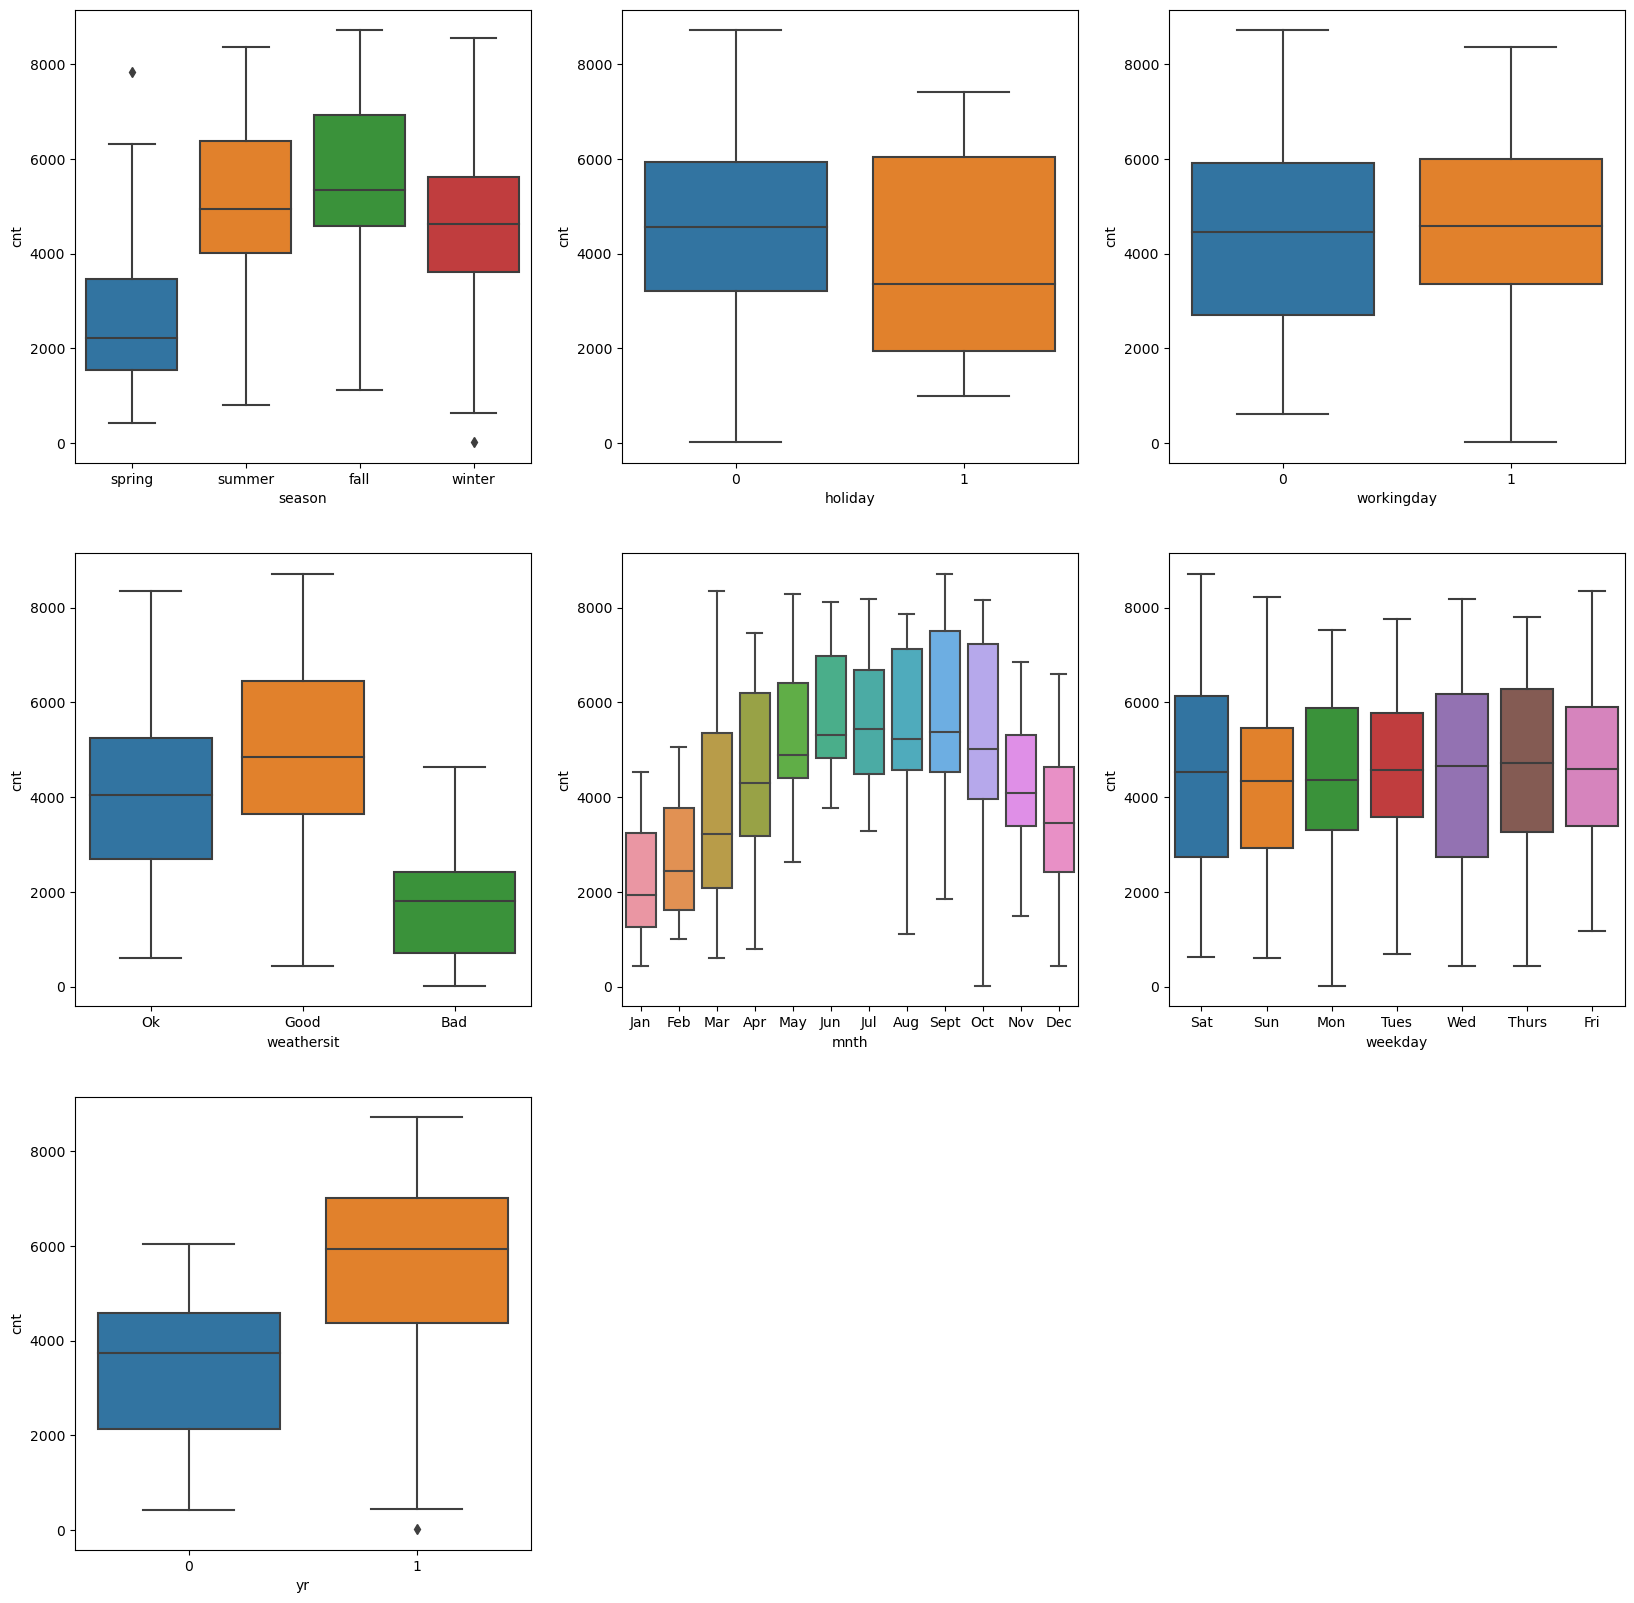

In [522]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_Sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_Sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_Sharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_Sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_Sharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_Sharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike_Sharing)
plt.show()

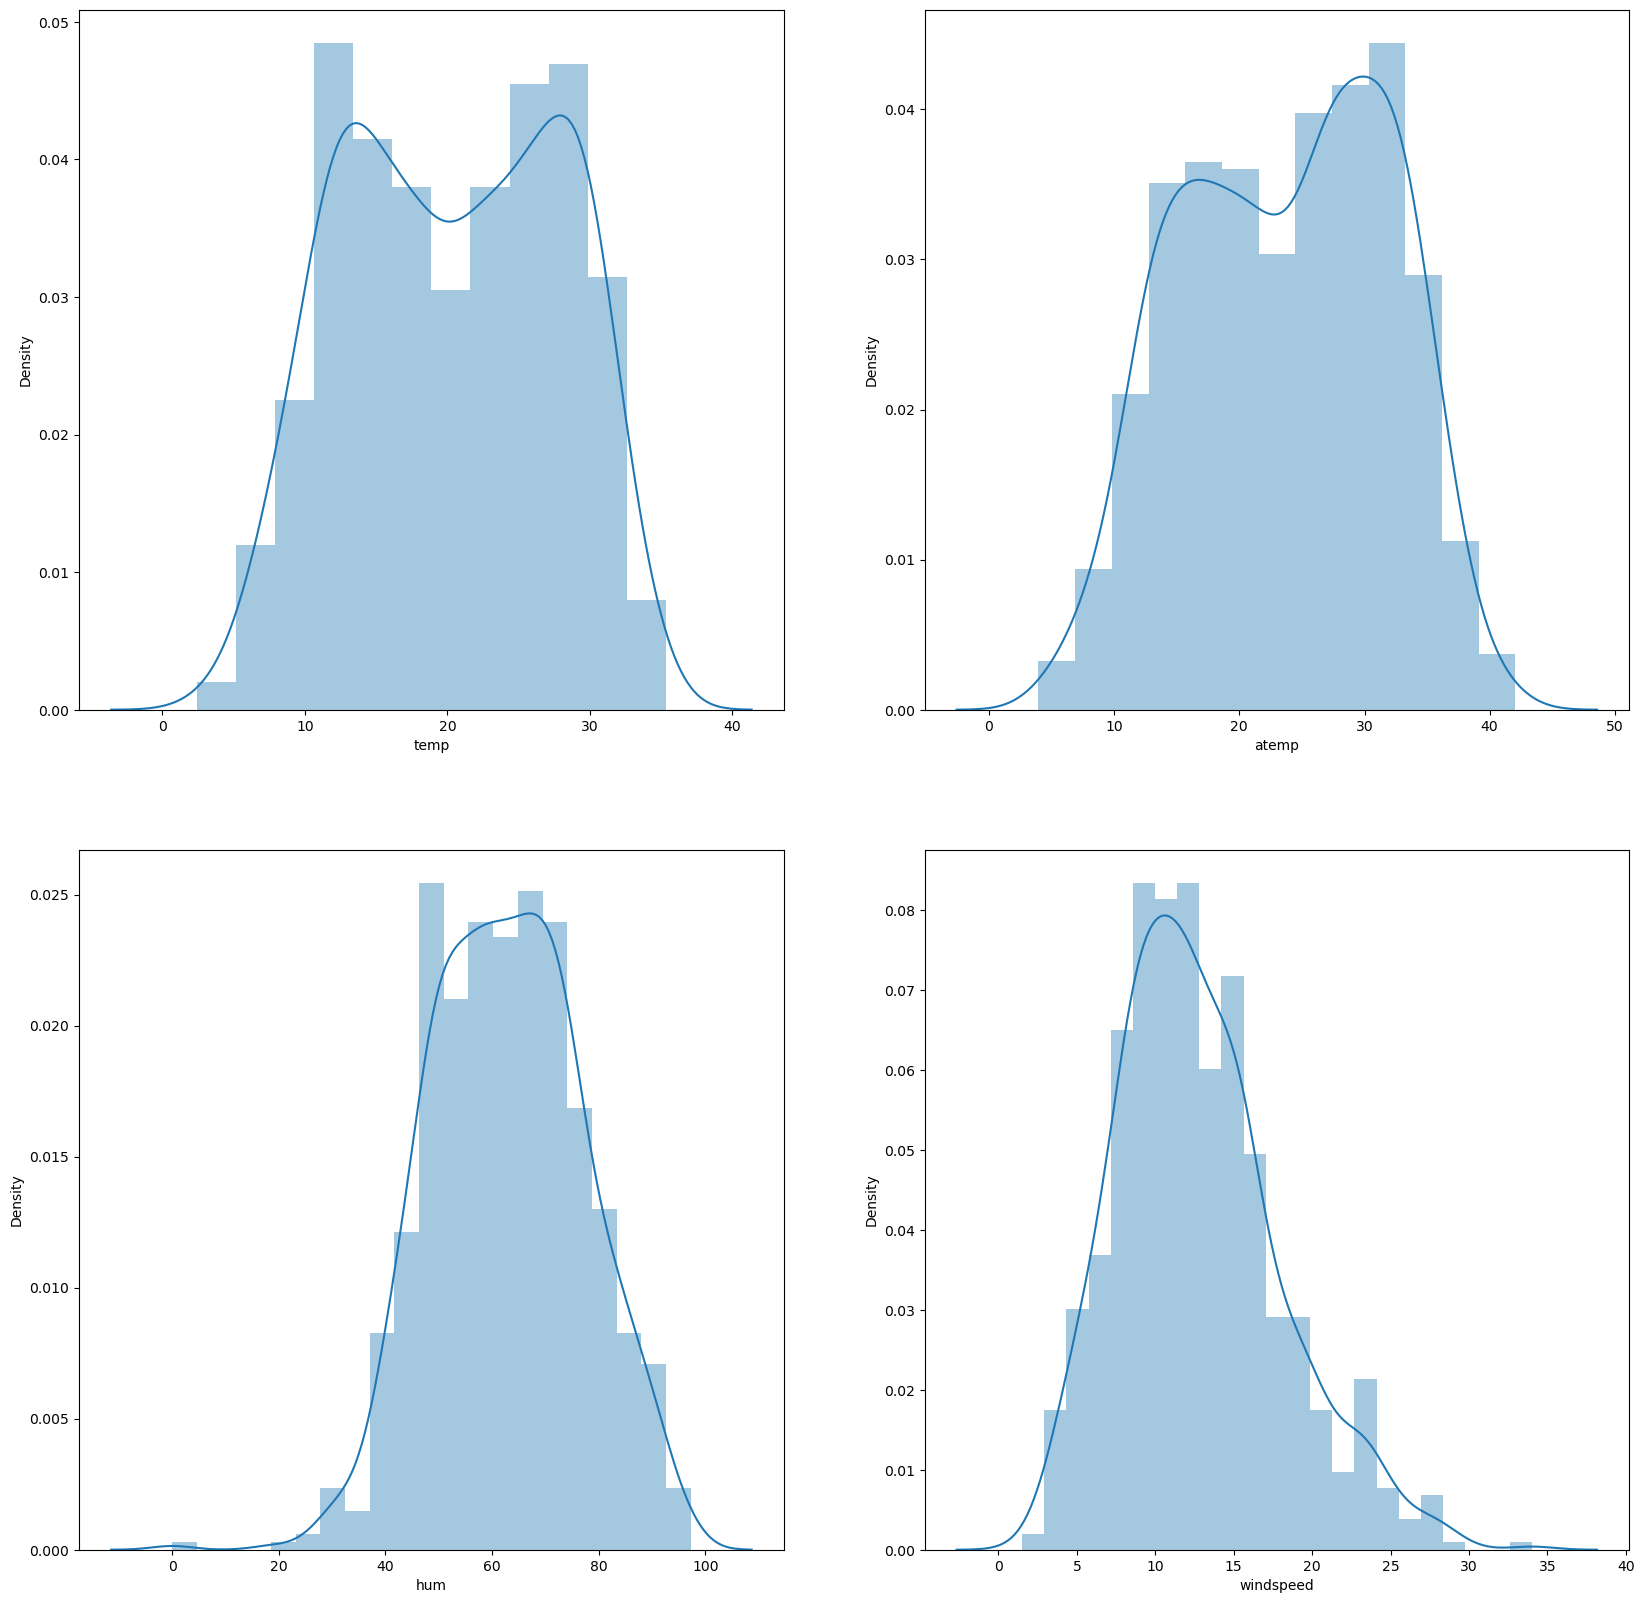

In [523]:
plt.figure(figsize=(20, 20))  
plt.subplot(2,2,1)
sns.distplot(Bike_Sharing['temp'])
plt.subplot(2,2,2)
sns.distplot(Bike_Sharing['atemp'])
plt.subplot(2,2,3)
sns.distplot(Bike_Sharing['hum'])
plt.subplot(2,2,4)
sns.distplot(Bike_Sharing['windspeed'])

plt.show()

In [524]:
Numeric_col = Bike_Sharing[["temp","atemp","hum","windspeed","casual","registered","cnt"]]

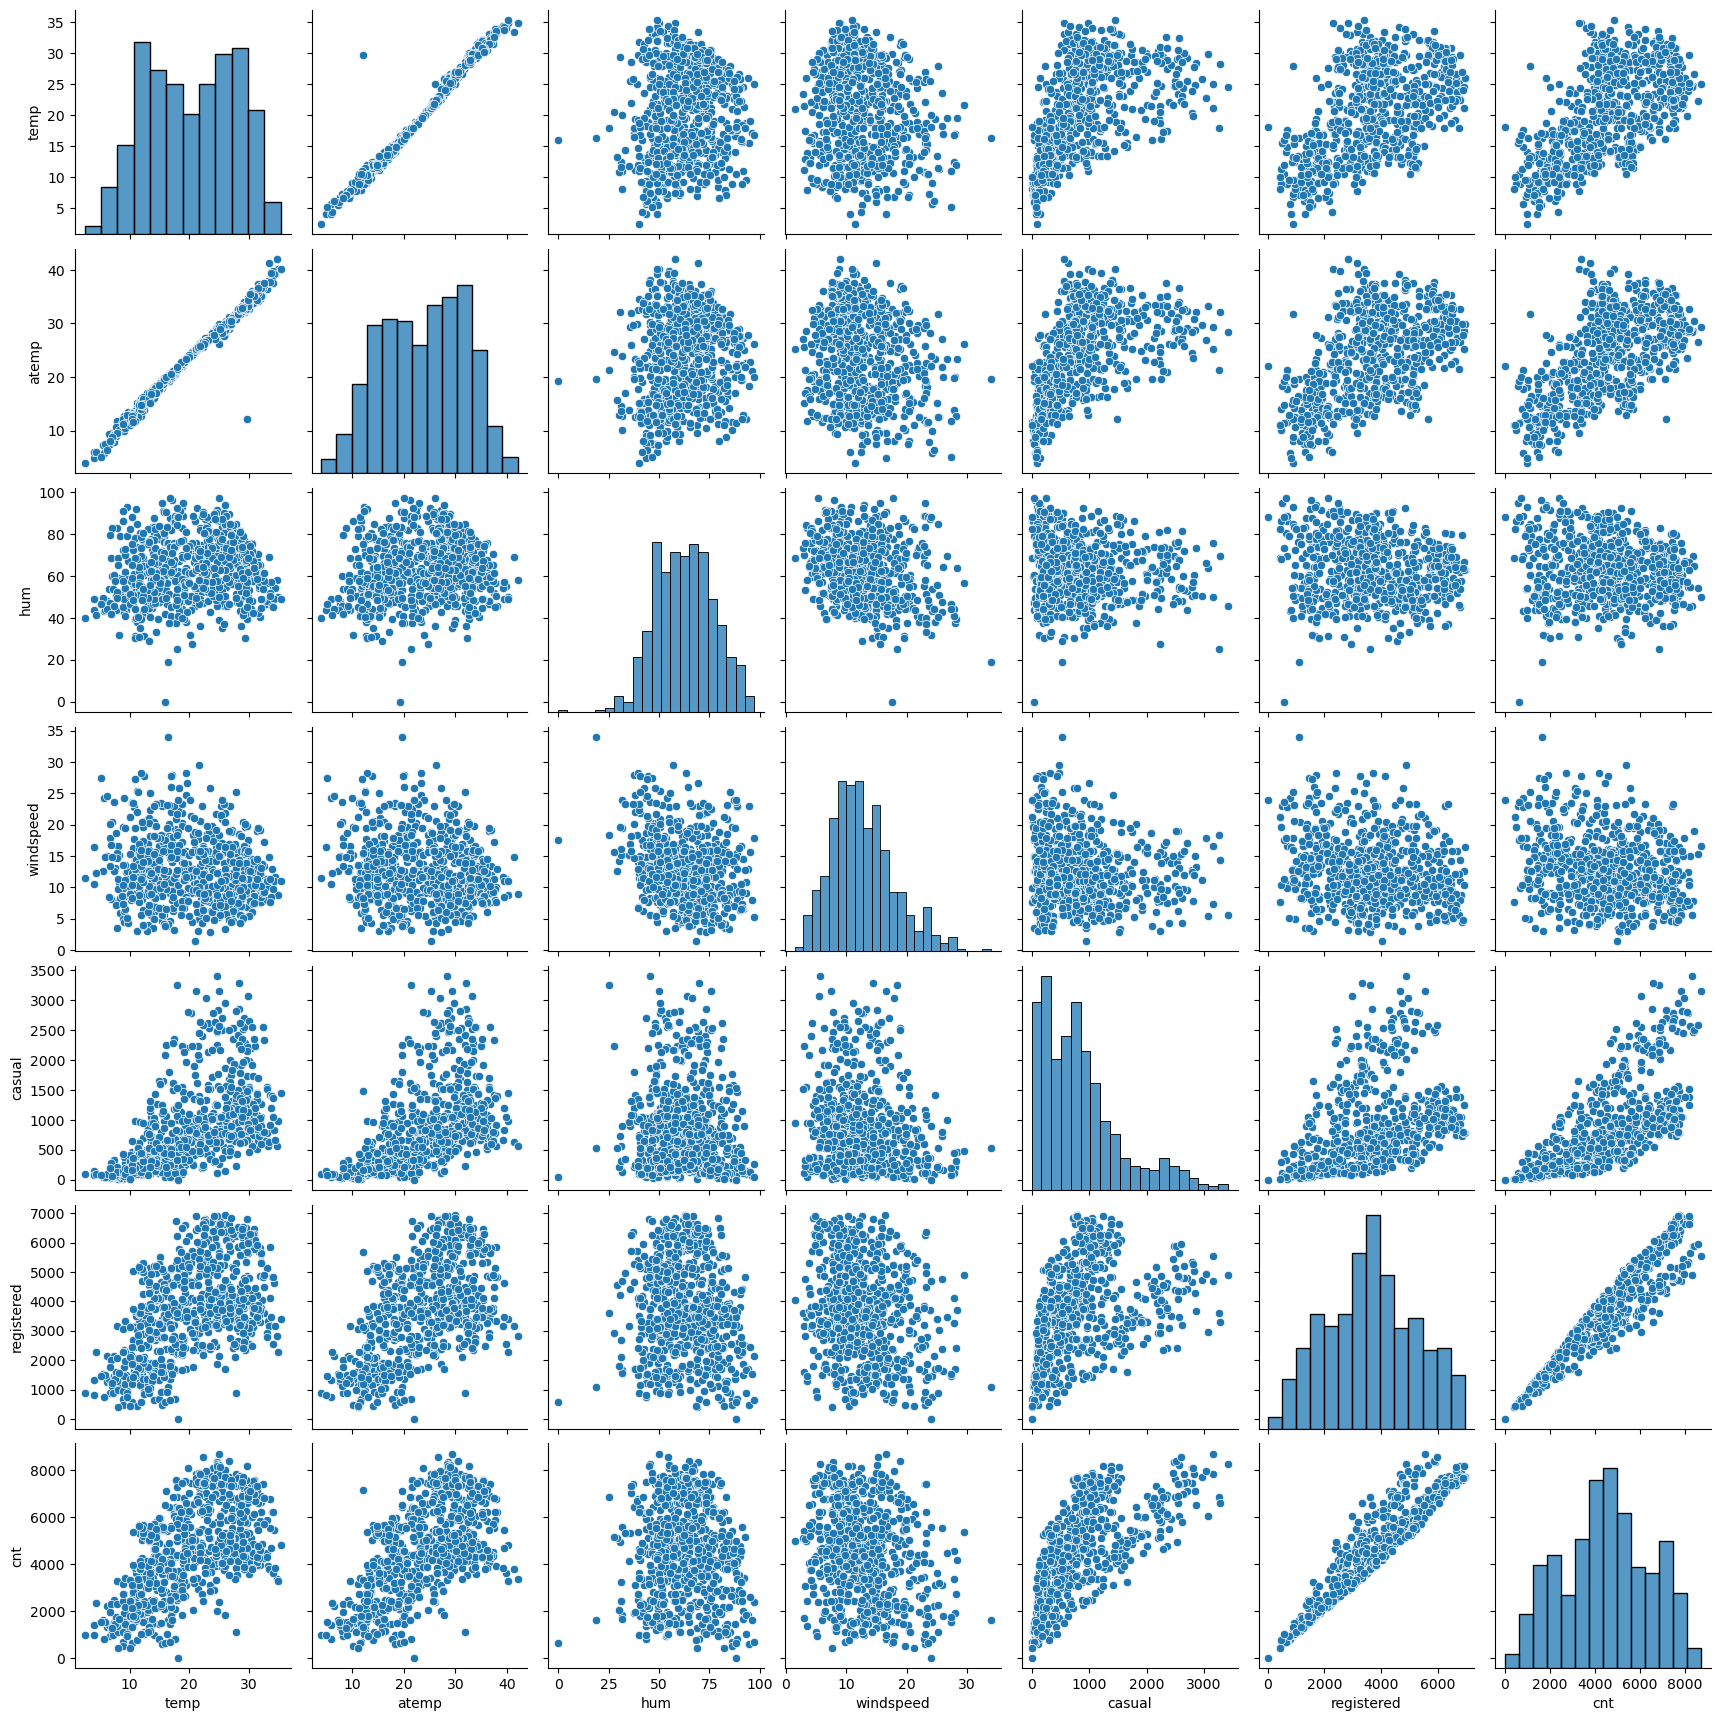

In [525]:
# Pairwise scatter plot
sns.pairplot(Numeric_col)
plt.show()

In [526]:
corr = Numeric_col.corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


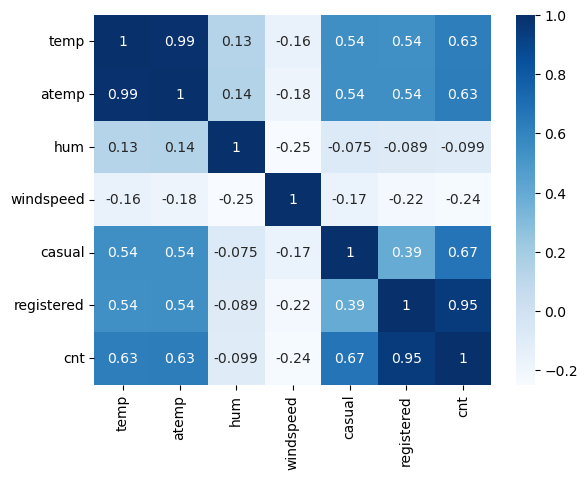

In [527]:
sns.heatmap(corr,annot=True,cmap="Blues")
plt.show()

<i>insights from the heatmap:</i>

<b>Correlation of 'cnt' with independent variables:</b>
- 'cnt' is highly correlated with 'casual' and 'registered'.
- 'cnt' is also highly and positively correlated to 'temp' and 'atemp'.
- 'cnt' is negatively correlated to 'windspeed' (-0.24 approximately). 


<b>Correlation among independent variables:</b>
- Independent variables 'atemp' and 'temp' are highly correlated. The correlation between the two is almost equal to 1.


<i>While building the model, we'll have to pay attention to multicollinearity. Thus we will remove some of the highly correlated columns. </i>

In [528]:
#removing atemp as it is highly correlated with temp
Bike_Sharing.drop('atemp',axis=1,inplace=True) 

In [529]:
#removing 'casual'and 'registered' as they add up to value in 'cnt'
Bike_Sharing.drop(['casual','registered'],axis=1,inplace=True) 

In [530]:
Bike_Sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Ok,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Ok,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Good,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tues,1,Good,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Good,9.305237,43.6957,12.522300,1600


## 4. Data Preparation

In [531]:
# Subset all categorical variables
Bike_Sharing_categorical=Bike_Sharing.select_dtypes(include=['object'])

<b>Dummy Variables</b>

In [532]:
# Convert into dummies
Bike_Sharing_dummies = pd.get_dummies(Bike_Sharing_categorical, drop_first=True)
Bike_Sharing_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Good,weathersit_Ok
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [533]:
# Drop categorical variable columns
Bike_Sharing = Bike_Sharing.drop(list(Bike_Sharing_categorical.columns), axis=1)

In [534]:
Bike_Sharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,1,9.305237,43.6957,12.522300,1600


In [535]:
# Concatenate dummy variables with the original dataframe
Bike_Sharing = pd.concat([Bike_Sharing, Bike_Sharing_dummies], axis=1)

In [536]:
# Let's check the first few rows
Bike_Sharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Good,weathersit_Ok
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,1,0


## 5. Model Building and Evaluation

<b> Test-Train Split</b>

In [537]:
# Split the dataframe into train and test sets
np.random.seed(0)
df_train, df_test = train_test_split(Bike_Sharing, train_size=0.7, test_size=0.3, random_state=100)

In [538]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Good,weathersit_Ok
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664,0,1,0,...,0,0,1,0,0,0,0,0,0,1
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,0,...,0,0,0,0,0,1,0,0,1,0
53,0,0,1,9.091299,42.3043,6.305571,1917,1,0,0,...,0,0,0,0,0,0,0,1,1,0
350,0,0,0,10.591653,56.0833,16.292189,2739,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [539]:
df_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Good,weathersit_Ok
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,10.899153,68.7917,11.791732,2947,1,0,0,...,0,0,0,0,1,0,0,0,0,1
702,1,0,1,19.509153,73.3750,11.666643,6606,0,0,1,...,0,0,0,0,0,0,1,0,1,0
127,0,0,0,21.661653,63.1667,5.000712,4333,0,1,0,...,0,0,0,0,1,0,0,0,1,0
640,1,0,1,26.957500,79.3750,4.458569,7572,0,0,1,...,1,0,0,0,0,0,0,1,0,1


<b>Scaling Numeric Columns</b>

In [540]:
scaler = MinMaxScaler()

In [541]:
# scaling all columns except the 'yes-no' and 'dummy' variables
sclvar = ['temp', 'hum', 'windspeed','cnt']
df_train[sclvar] = scaler.fit_transform(df_train[sclvar])

In [542]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Good,weathersit_Ok
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.764151,0,1,0,...,0,0,1,0,0,0,0,0,0,1
578,1,0,1,0.863973,0.679690,0.187140,0.832835,0,0,0,...,0,0,0,0,0,1,0,0,1,0
53,0,0,1,0.202618,0.435939,0.111379,0.218017,1,0,0,...,0,0,0,0,0,0,0,1,1,0
350,0,0,0,0.248216,0.577930,0.431816,0.312586,0,0,1,...,0,0,0,1,0,0,0,0,0,1


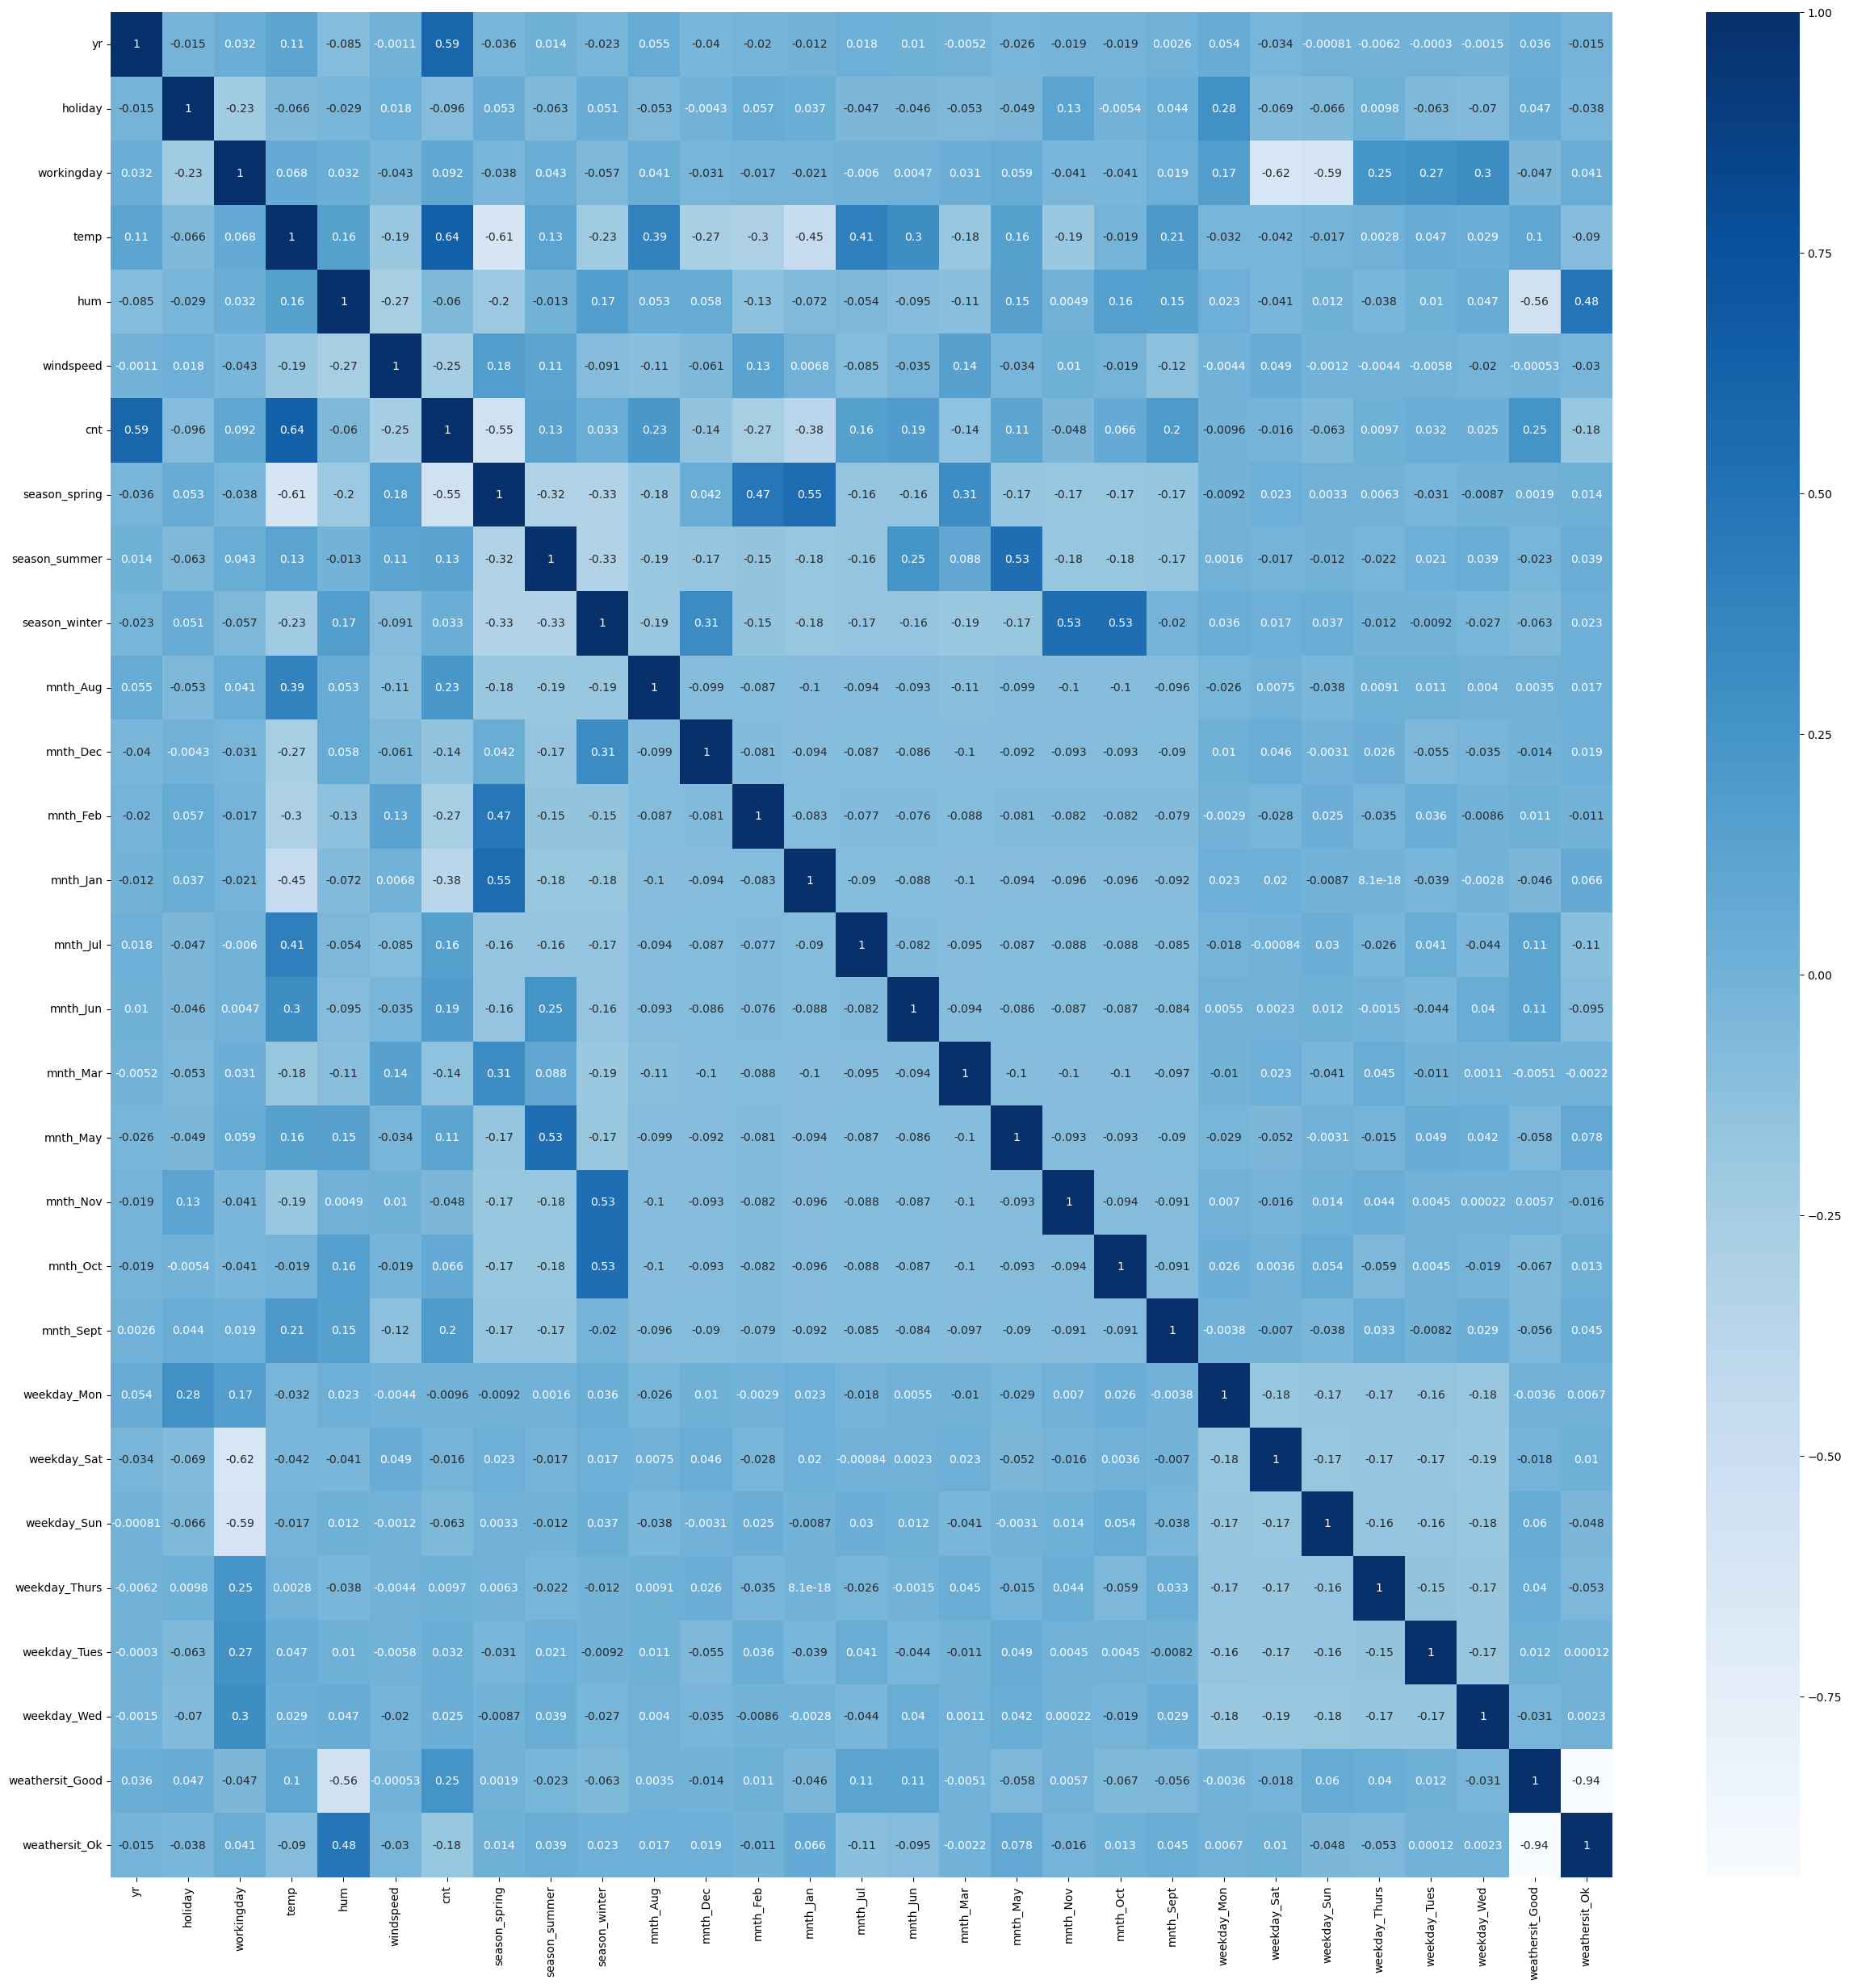

In [543]:
# Checking for high correlation among variables
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="Blues")
plt.show()

<i>'temp' seems to the correlated to 'cnt' the most, after 'casual' and 'registered'.</i>

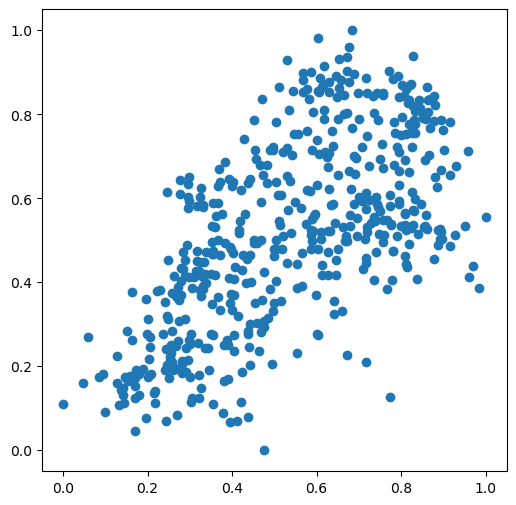

In [544]:
# pairplot for temp vs cnt.
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

<b>Dividing into X and Y sets for the model building</b>

In [545]:
# Dividing into X and Y set
y_train = df_train.pop('cnt')
X_train = df_train

In [546]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Good,weathersit_Ok
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [547]:
X_train.shape

(510, 28)

In [548]:
# Converting all the features into array
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

<b>Building the first model</b>

In [549]:
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const              0.039130
yr                 0.232116
holiday           -0.041530
workingday         0.045395
temp               0.450562
hum               -0.151340
windspeed         -0.186453
season_spring     -0.048159
season_summer      0.038725
season_winter      0.105847
mnth_Aug           0.014404
mnth_Dec          -0.045586
mnth_Feb          -0.032282
mnth_Jan          -0.062777
mnth_Jul          -0.040350
mnth_Jun          -0.002972
mnth_Mar           0.001045
mnth_May           0.023940
mnth_Nov          -0.041851
mnth_Oct           0.007534
mnth_Sept          0.081060
weekday_Mon       -0.020907
weekday_Sat        0.044900
weekday_Sun       -0.009636
weekday_Thurs     -0.009237
weekday_Tues      -0.018890
weekday_Wed       -0.005388
weathersit_Good    0.257443
weathersit_Ok      0.196376
dtype: float64

In [550]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [551]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23211572 -0.0513123   0.03561284  0.45056169 -0.15134004 -0.18645332
 -0.04815901  0.03872462  0.10584692  0.01440398 -0.0455859  -0.03228181
 -0.06277659 -0.04035007 -0.00297239  0.00104515  0.02393995 -0.04185131
  0.00753359  0.0810599  -0.02090673  0.03511753 -0.01941807 -0.00923674
 -0.01888985 -0.00538751  0.25744279  0.19637639]
0.0489128449505421


In [552]:
# getting the model summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          8.74e-182
Time:                        19:51:43   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0391      0.043     

<i>This model has an Adjusted R-squared value of 84.5% which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable.</i>

### Feature elimination with RFE

#### Model with 21 features

In [553]:
# RFE with 21 features
lm1 = LinearRegression()
rfe1 = RFE(lm1, n_features_to_select=21,step=1)

# Fit with 21 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True False  True False  True  True False
 False False  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 8 1 1 4 1 2 1 1 5 3 6 1 1]


In [554]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 21 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sept,weekday_Sat,weekday_Sun,weathersit_Good,weathersit_Ok
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,...,0,0,1,0,0,0,0,0,1,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,1,0,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,1,1,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [555]:
# Fitting the model with 21 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.2
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          1.62e-188
Time:                        19:51:43   Log-Likelihood:                 526.45
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -922.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0377      0.040     

The new model built on the selected features doesn't show any dip in the accuracy in comparison to the model which was built on all the features. It has gone from 84.5% to 84.6%. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

In [556]:
p=X_train_rfe1.drop('const',axis=1)

In [557]:
# Create a dataframe containing feature variables and their respective VIFs.
vif = pd.DataFrame()
vif['Features'] = p.columns
vif['VIF'] = [variance_inflation_factor(p.values, i) for i in range(p.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,108.98
17,weekday_Sat,25.62
18,weekday_Sun,24.44
19,weathersit_Good,10.47
20,weathersit_Ok,9.02
6,season_spring,8.54
7,season_summer,6.57
8,season_winter,6.28
1,holiday,5.31
3,temp,4.91


#### Model with 14 features

In [558]:
# RFE with 14 features
lm2 = LinearRegression()
rfe2 = RFE(lm2, n_features_to_select=14,step=1)

# Fit with 14 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True  True  True  True  True  True  True  True False False False
 False  True False False False False False  True False  True False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  7  4  5  2  1 14 15  6  3 11  1  9  1  8 12
 10 13  1  1]




Let's now check the summary of this model 

In [559]:
# Subset the features selected by rfe2
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 15 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_Sat,weathersit_Good,weathersit_Ok
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,1,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1


In [560]:
# Fitting the model with 15 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          1.13e-191
Time:                        19:51:43   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0070      0.048     

The new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all
the features. It has gone from 84.6% to 84.3%. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

In [561]:
q=X_train_rfe2.drop('const',axis=1)

In [562]:
# Create a dataframecontaining feature variables and their respective VIFs.
vif = pd.DataFrame()
vif['Features'] = q.columns
vif['VIF'] = [variance_inflation_factor(q.values, i) for i in range(q.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,25.03
3,temp,21.43
12,weathersit_Good,14.49
13,weathersit_Ok,8.87
6,season_spring,5.53
2,workingday,5.41
5,windspeed,4.66
8,season_winter,4.05
7,season_summer,3.18
0,yr,2.09


#### Model with 7 features

In [563]:
# RFE with 7 features
lm3 = LinearRegression()
rfe3 = RFE(lm3, n_features_to_select=7,step=1)

# Fit with 7 features
rfe3.fit(X_train, y_train)

# Print the boolean results
print(rfe3.support_)           
print(rfe3.ranking_)  

[ True False False  True  True  True  True False False False False False
 False False False False False False False False False False False False
 False False  True  True]
[ 1  3  8  1  1  1  1  6  5 14 11 12  9  2 21 22 13 10 18  4 16  7 15 19
 17 20  1  1]


In [564]:
# Subset the features selected by rfe3
col1 = X_train.columns[rfe3.support_]

# Subsetting training data for 7 selected columns
X_train_rfe3 = X_train[col1]

# Add a constant to the model
X_train_rfe3 = sm.add_constant(X_train_rfe3)
X_train_rfe3.head()

,const,yr,temp,hum,windspeed,season_spring,weathersit_Good,weathersit_Ok
653,1.0,1,0.509887,0.575354,0.300794,0,1,0
576,1.0,1,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0.442393,0.640189,0.255342,1,0,1
728,1.0,1,0.245101,0.498067,0.663106,1,1,0
482,1.0,1,0.395666,0.504508,0.188475,0,0,1


In [565]:
# Fitting the model with 7 variables
lm3 = sm.OLS(y_train, X_train_rfe3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     314.8
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          4.28e-179
Time:                        19:51:43   Log-Likelihood:                 468.08
No. Observations:                 510   AIC:                            -920.2
Df Residuals:                     502   BIC:                            -886.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1389      0.047     

The new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all
the features. It has gone from 84.3% to 81.2%. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

let's check the VIF for these selected features and decide further.

In [566]:
r=X_train_rfe3.drop('const',axis=1)

In [567]:
# Create a dataframe containing feature variables and their respective VIFs.
vif = pd.DataFrame()
vif['Features'] = r.columns
vif['VIF'] = [variance_inflation_factor(r.values, i) for i in range(r.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,15.73
5,weathersit_Good,11.10
1,temp,10.80
6,weathersit_Ok,7.82
3,windspeed,4.17
0,yr,2.06
4,season_spring,2.04


#### Model with 3 features

In [568]:
# RFE with 3 features
lm4 = LinearRegression()
rfe4 = RFE(lm4, n_features_to_select=3,step=1)

# Fit with 3 features
rfe4.fit(X_train, y_train)

# Print the boolean results
print(rfe4.support_)           
print(rfe4.ranking_)  

[ True False False  True False  True False False False False False False
 False False False False False False False False False False False False
 False False False False]
[ 1  7 12  1  5  1  4 10  9 18 15 16 13  6 25 26 17 14 22  8 20 11 19 23
 21 24  2  3]


In [569]:
# Subset the features selected 
col1 = X_train.columns[rfe4.support_]

# Subsetting training data for 3 selected columns
X_train_rfe4 = X_train[col1]

# Add a constant to the model
X_train_rfe4 = sm.add_constant(X_train_rfe4)
X_train_rfe4.head()

,const,yr,temp,windspeed
653,1.0,1,0.509887,0.300794
576,1.0,1,0.815169,0.264686
426,1.0,1,0.442393,0.255342
728,1.0,1,0.245101,0.663106
482,1.0,1,0.395666,0.188475


In [570]:
# Fitting the model with 3 variables
lm4 = sm.OLS(y_train, X_train_rfe4).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     416.0
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          3.84e-136
Time:                        19:51:43   Log-Likelihood:                 355.52
No. Observations:                 510   AIC:                            -703.0
Df Residuals:                     506   BIC:                            -686.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1570      0.019      8.177      0.0







The new model built on the selected features does shows some dip in the accuracy in comparison to the model which was built on 7 features. It has gone from 81.2% to 71.0%. So, 71 % of the changes in 'cnt' can be explained the variables 'temp','windspeed'and 'yr'.This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.




In [571]:
s=X_train_rfe4.drop('const',axis=1)

# Create a dataframe containing feature variables and their respective VIFs.
vif = pd.DataFrame()
vif['Features'] = s.columns
vif['VIF'] = [variance_inflation_factor(s.values, i) for i in range(s.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.06
2,windspeed,2.68
0,yr,1.97


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variable have  VIF < 5.



### Residual Analysis
Before we make predictions on the test set, let's first analyse the residuals.

In [572]:
y_train_cnt = lm4.predict(X_train_rfe4)

Text(0.5, 0, 'Errors')

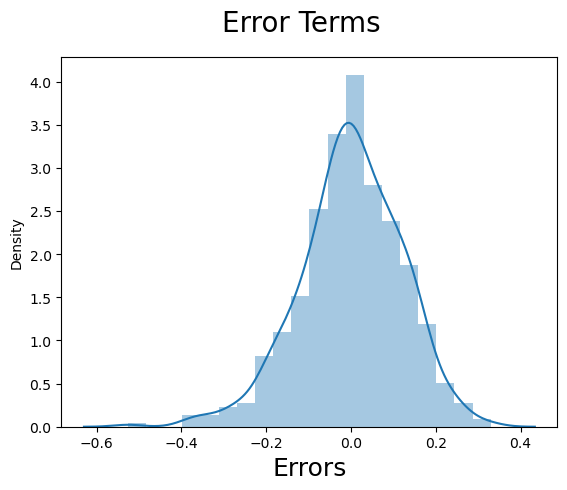

In [573]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)   

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [574]:
X_train_rfe4

,const,yr,temp,windspeed
653,1.0,1,0.509887,0.300794
576,1.0,1,0.815169,0.264686
426,1.0,1,0.442393,0.255342
728,1.0,1,0.245101,0.663106
482,1.0,1,0.395666,0.188475
...,...,...,...,...
526,1.0,1,0.824514,0.355596
578,1.0,1,0.863973,0.187140
53,1.0,0,0.202618,0.111379
350,1.0,0,0.248216,0.431816


In [575]:
df_test[sclvar] = scaler.transform(df_test[sclvar])

In [576]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test

In [577]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Good,weathersit_Ok
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [578]:
# Let's check the list 'col2' which had the 3 variables RFE had selected
col2=s.columns
col2

Index(['yr', 'temp', 'windspeed'], dtype='object')

In [579]:
# Let's subset these columns and create a new dataframe 'X_test_rfe4'
X_test_rfe4 = X_test[col2]

In [580]:
# Add a constant to the test set created
X_test_rfe4 = sm.add_constant(X_test_rfe4)
X_test_rfe4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      219 non-null    float64
 1   yr         219 non-null    int64  
 2   temp       219 non-null    float64
 3   windspeed  219 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 8.6 KB


In [581]:
# Making predictions
y_pred = lm4.predict(X_test_rfe4)

Text(0, 0.5, 'y_pred')

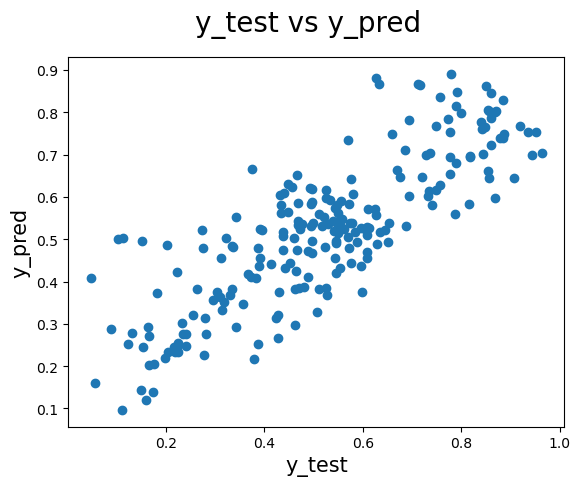

In [582]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 15)                          # X-label
plt.ylabel('y_pred', fontsize = 15)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [583]:
# r2_score for 3 variables
r2_score(y_test, y_pred)

0.6804354107208683

Thus, for the model with 3 variables, the adjusted r-squared on the train set is about is about 68.0%.

#### Checking the correlations between the final predictor variables

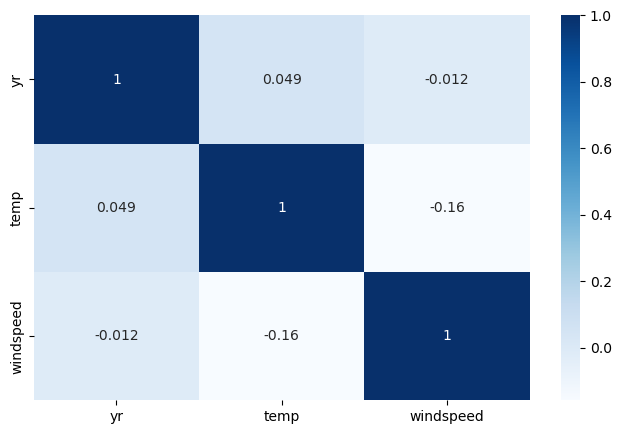

In [584]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(Bike_Sharing[col2].corr(), cmap="Blues", annot=True)
plt.show()

This is the simplest model that we could build. The final predictors seem to have fairly low correlations.

Thus, the final model consists of the 3 variables mentioned above.We can use this model for predicting count of daily bike rentals.